In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib.font_manager import FontProperties, fontManager
from PIL import Image

Process dataset

In [2]:
df = pd.read_csv('Pearson.tsv', sep='\t')

In [3]:
x, y = df.Father, df.Son

Set fonts

In [4]:
font_path = './Urbanist-Medium.ttf'
prop = FontProperties(fname=font_path)
fontManager.addfont(font_path)

Functions to build histograms

In [5]:
def choose_title(number, var, fix_var):
    """ Return graph subtitle depending in its position
    """
    if not number:
        return "\n\n" + r"$\bf{" + f"Distribution \ of \ {var}s\' \ heights \ whose \ {fix_var}s\' \ heights \ are"+ "}$" + "\n\nunder 67 inches"
    elif number == 1:
        return "67-70 inches"
    return "over 70 inches"

In [36]:
def create_norm_distr(data):
    """ Create normal distribution for graph data
    """
    mu, std = norm.fit(data)
    x_norm = np.linspace(min(data), max(data), 100)
    y_norm = norm.pdf(x_norm, mu, std) * len(data) * 0.5
    return x_norm, y_norm

In [43]:
def x_distr_plot(ax, number, data):
    """ Plot the distribution of fathers' heights within the given subset of data
    """
    bins = np.arange(59, 76, 0.5)
    ax.hist(data, bins=bins, alpha=0.7)
    ax.set_xticks(np.arange(60, 76, 2.5))
    ax.set_title(choose_title(number, 'father', 'son'), fontsize=8)
    ax.invert_yaxis()
    x_norm, y_norm = create_norm_distr(data)
    ax.set_yticks(np.arange(0, max(y_norm) + 20, 10))
    ax.plot(x_norm, y_norm, alpha=0.5)

In [44]:
def y_distr_plot(ax, number, data):
    """ Plot the distribution of sons' heights within the given subset of data
    """
    bins = np.arange(58.5, 79, 0.5)
    ax.hist(data, orientation='horizontal', bins=bins, alpha=0.7)
    ax.set_yticks(np.arange(60, 78, 2.5))
    ax.set_title(choose_title(number, 'son', 'father'), fontsize=8, loc=('left' if not number else 'center'))
    x_norm, y_norm = create_norm_distr(data)
    ax.set_xticks(np.arange(0, max(y_norm) + 20, 10))
    ax.plot(y_norm, x_norm, alpha=0.5)

Process cat image

In [9]:
cat = np.asarray(Image.open('./cat.jpg'))

Set plot font params

In [10]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

Build & show the plot

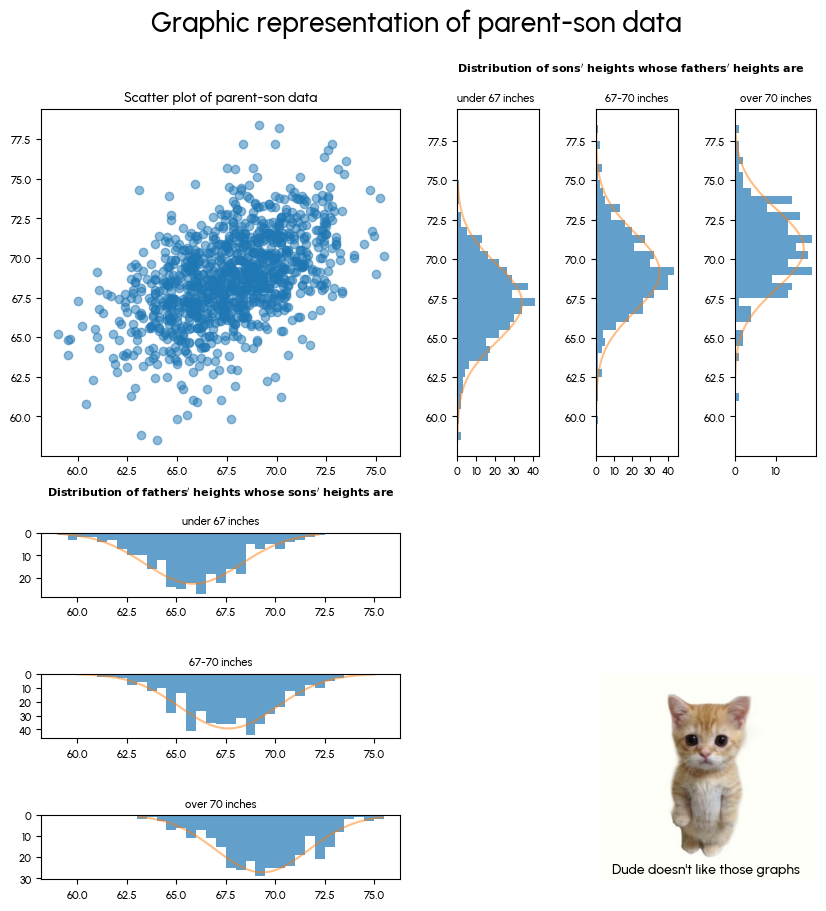

In [48]:
# Build figure & grid
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(6, 6, wspace=0.7, hspace=1.2)

# Set title for the whole graph
fig.suptitle('Graphic representation of parent-son data', fontsize=20)

general_ax = fig.add_subplot(grid[:3, :3]) # Axis for scatter plot
cat_ax = fig.add_subplot(grid[4:, 4:]) # Axis for cat image

# Json (axis to data) for fathers height distribution
x_ax = {
    fig.add_subplot(grid[3, :3]): df[df['Son'] < 67]['Father'],
    fig.add_subplot(grid[4, :3]): df[(df['Son'] >= 67) & (df['Son'] <= 70)]['Father'],
    fig.add_subplot(grid[5, :3]): df[df['Son'] > 70]['Father']
}

# Json (axis to data) for sons height distribution
y_ax = {
    fig.add_subplot(grid[:3, 3]): df[df['Father'] < 67]['Son'],
    fig.add_subplot(grid[:3, 4]): df[(df['Father'] >= 67) & (df['Father'] <= 70)]['Son'],
    fig.add_subplot(grid[:3, 5]): df[df['Father'] > 70]['Son']
}

# Build scatter plot
general_ax.scatter(x, y, alpha=0.5)
general_ax.set_title('Scatter plot of parent-son data', fontsize=10)

# Build 3 histograms for fathers
for i, info in enumerate(x_ax.items()):
    ax, data = info
    x_distr_plot(ax, i, data)

# Build 3 histograms for sons
for i, info in enumerate(y_ax.items()):
    ax, data = info
    y_distr_plot(ax, i, data)

# Show cat image
cat_ax.imshow(cat)
cat_ax.set_axis_off()
cat_ax.set_title('Dude doesn\'t like those graphs', fontsize=10, y=-0.01)

plt.show()